<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project2 - Bike Sharing</h3>
</div>

<img src = "https://storage.googleapis.com/kaggle-competitions/kaggle/3948/media/bikes.png" width=80%>

## Importing the libraries

In [62]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Load and Prepare Data

In [63]:
df=pd.read_csv("train.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## EDA

In [64]:
df.shape

(10886, 12)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [66]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## Data Preprocessing

In [67]:
# کرایه دوچرخه در هر فصل

In [68]:
df2=df[['season','casual','registered']]
df2.groupby('season').sum()

,casual,registered
season,,
1,41605,270893
2,129672,458610
3,142718,497944
4,78140,465894


In [69]:
#کرایه دوچرخه در روزهای تعطیل و غیرتعطیل

In [70]:
df3=df[['holiday','casual','registered']]
df3.groupby('holiday').sum()

,casual,registered
holiday,,
0,376964,1650704
1,15171,42637


# اضافه نمودن آخر هفته به تعطیلات و روزهای کاری

In [71]:
df = df.assign(weekend=lambda x: np.where((x['holiday'] == 0) & (x['workingday'] == 0), 1, x['holiday']))

In [72]:
#کرایه دوچرخه بر اساس وضعیت آب و هوا 

In [134]:
df4=df[['weather','casual','registered']]
grouped_df=df4.groupby('weather').sum()
grouped_df

,casual,registered
weather,,
1,289900,1186163
2,87246,419914
3,14983,87106
4,6,158


In [74]:
#کرایه دوچرخه بر اساس دمای هوا

In [75]:
df5=df[['atemp','casual','registered','count']]
df5.groupby('atemp').sum()

,casual,registered,count
atemp,,,
0.760,0,2,2
1.515,0,3,3
2.275,1,265,266
3.030,13,563,576
3.790,19,606,625
4.545,26,701,727
5.305,57,1523,1580
6.060,176,4560,4736
6.820,189,3363,3552


In [76]:
#کرایه دوچرخه بر اساس میزان رطوبت هوا
df6=df[['humidity','casual','registered']]
df6.groupby('humidity').sum()

,casual,registered
humidity,,
0,46,577
8,16,61
10,19,88
12,6,23
13,3,14
...,...,...
93,909,13677
94,2881,25785
96,1,70


In [77]:
#کرایه دوچرخه بر اساس سرعت باد
df7=df[['windspeed','casual','registered']]
df7.groupby('windspeed').sum()

,casual,registered
windspeed,,
0.0000,39135,172391
6.0032,24645,104293
7.0015,29319,146308
8.9981,35007,161716
11.0014,39452,174339
12.9980,39077,171667
15.0013,38328,164283
16.9979,33703,143331
19.0012,29494,117909


## Strorytelling - Visualization

# کرایه دوچرخه در هوای مختلف

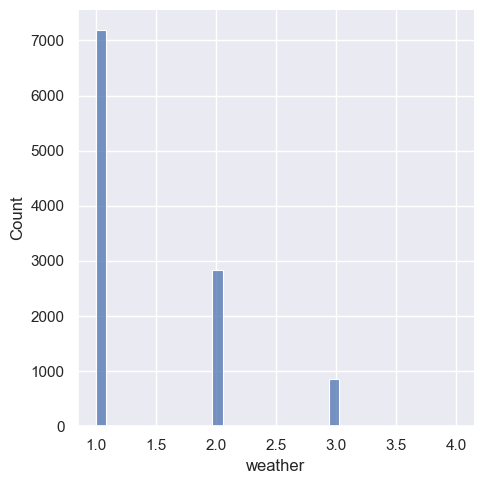

In [78]:
sns.displot(df, x="weather")

In [79]:
#کرایه دوچرخه در هر فصل

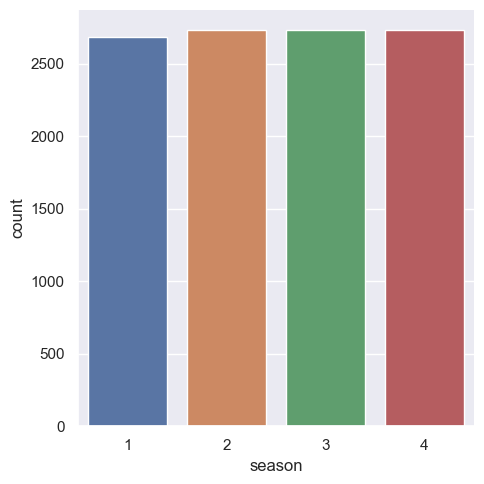

In [80]:
sns.catplot(x='season' ,kind="count",data=df)

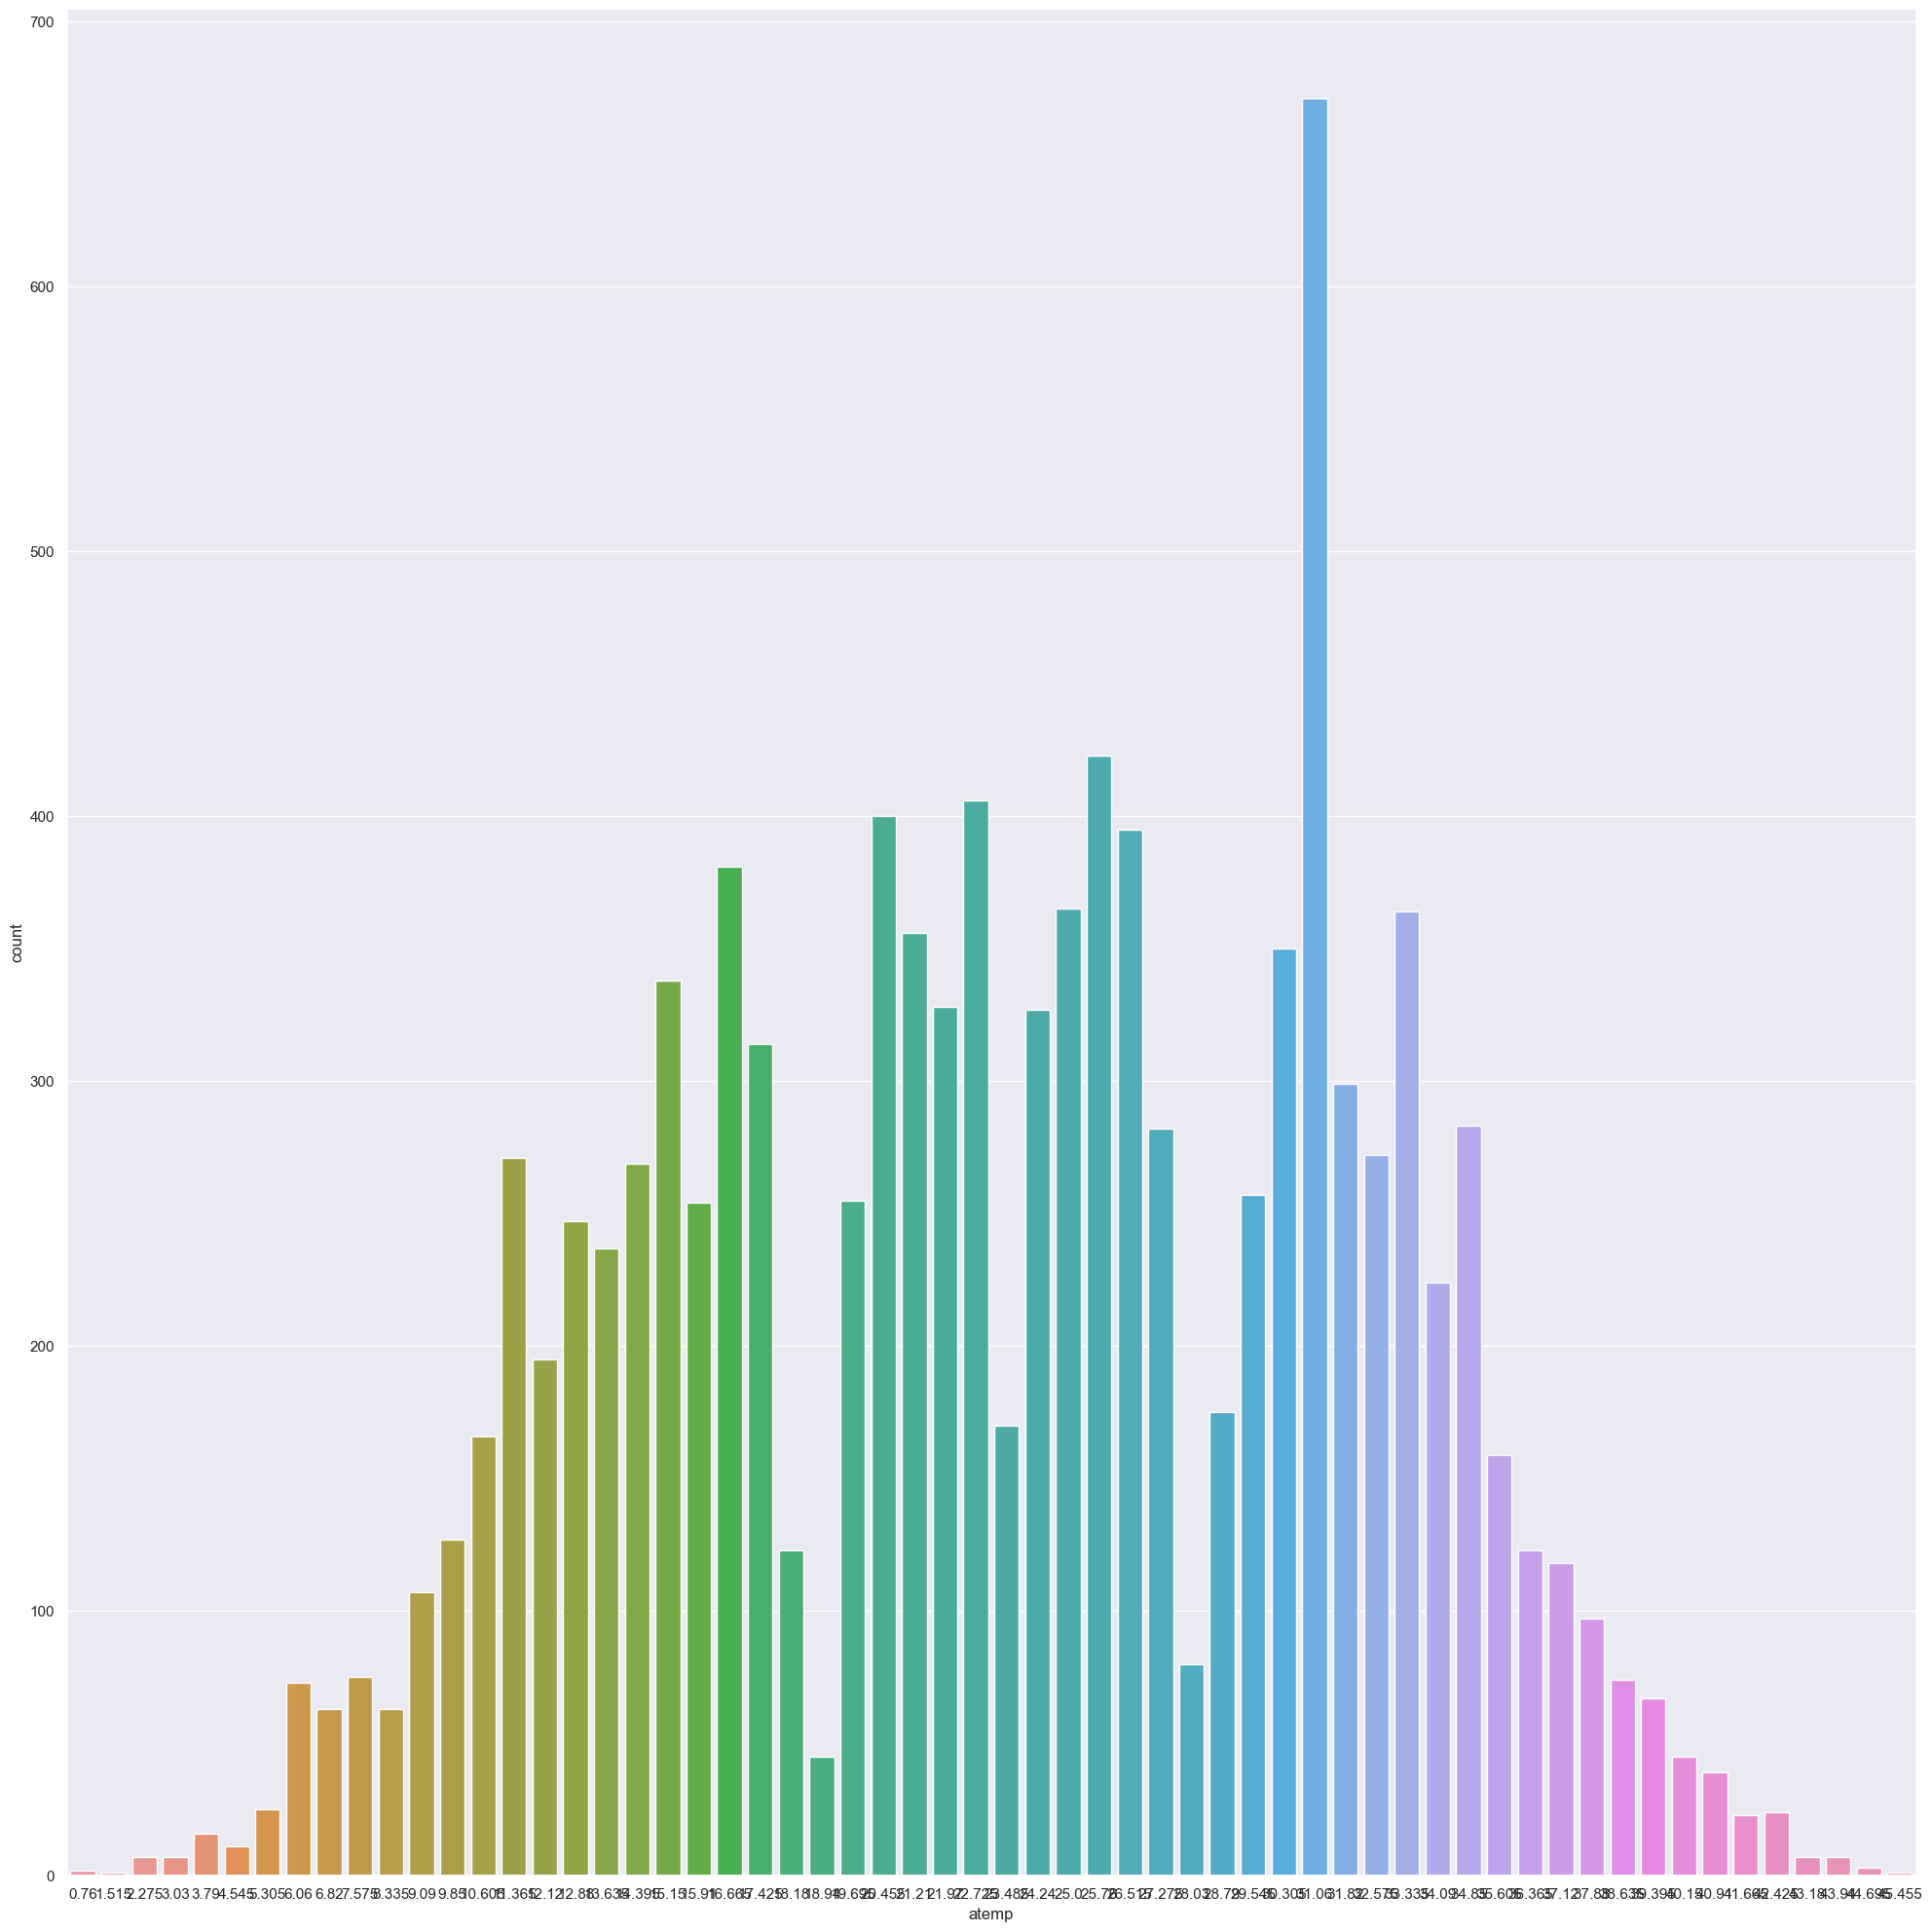

In [81]:
sns.catplot(x='atemp' ,kind="count",data=df , height=20)

In [82]:
# نمودار کرایه دوچرخه در ایام کاری ، آخر هفته و تعطیلات به تفکیک آب و هوا

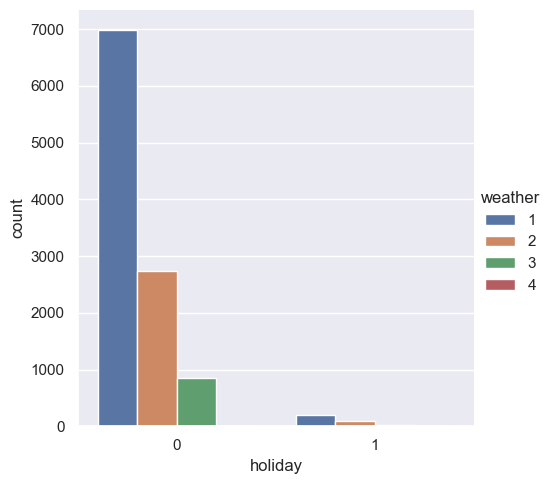

In [83]:
sns.catplot(x='holiday' ,hue="weather",kind="count",data=df)

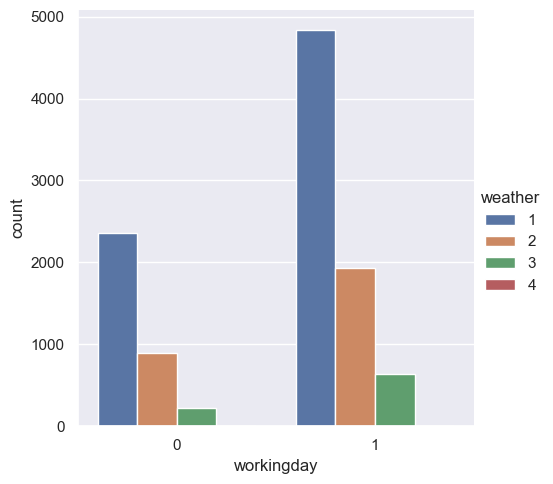

In [84]:
sns.catplot(x='workingday',hue="weather" ,kind="count",data=df)

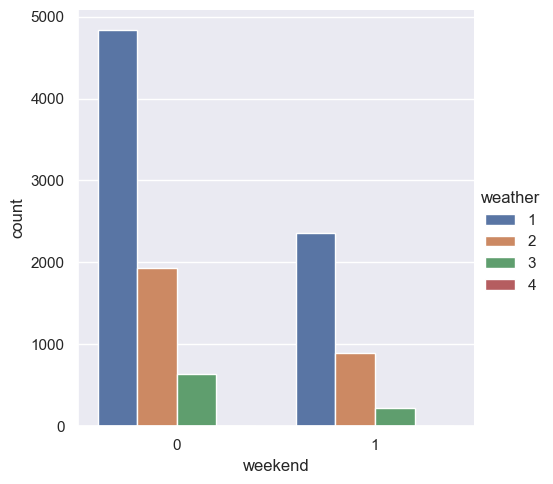

In [145]:
sns.catplot(x='weekend',hue="weather" ,kind="count",data=df)

In [143]:
#تعداد کرایه کنندگان عضو و عادی بر اساس وضعیت آب و هوا

Text(0.5, 0, 'Weather')

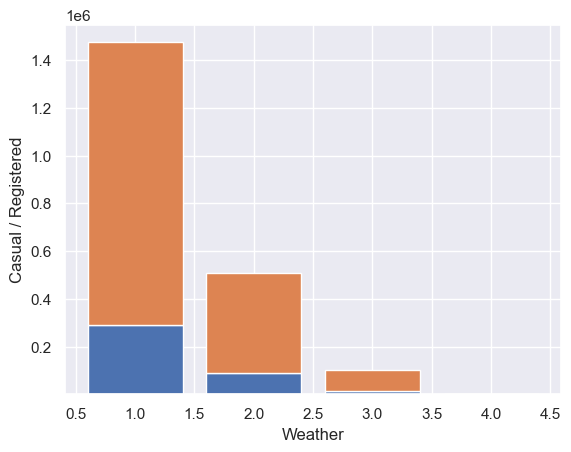

In [146]:
x = grouped_df.index
y1 = grouped_df['casual']
y2 = grouped_df['registered']
plt.bar(x, y1)
plt.bar(x, y2, bottom=y1)
plt.ylabel('Casual / Registered')
plt.xlabel('Weather')

In [ ]:
#

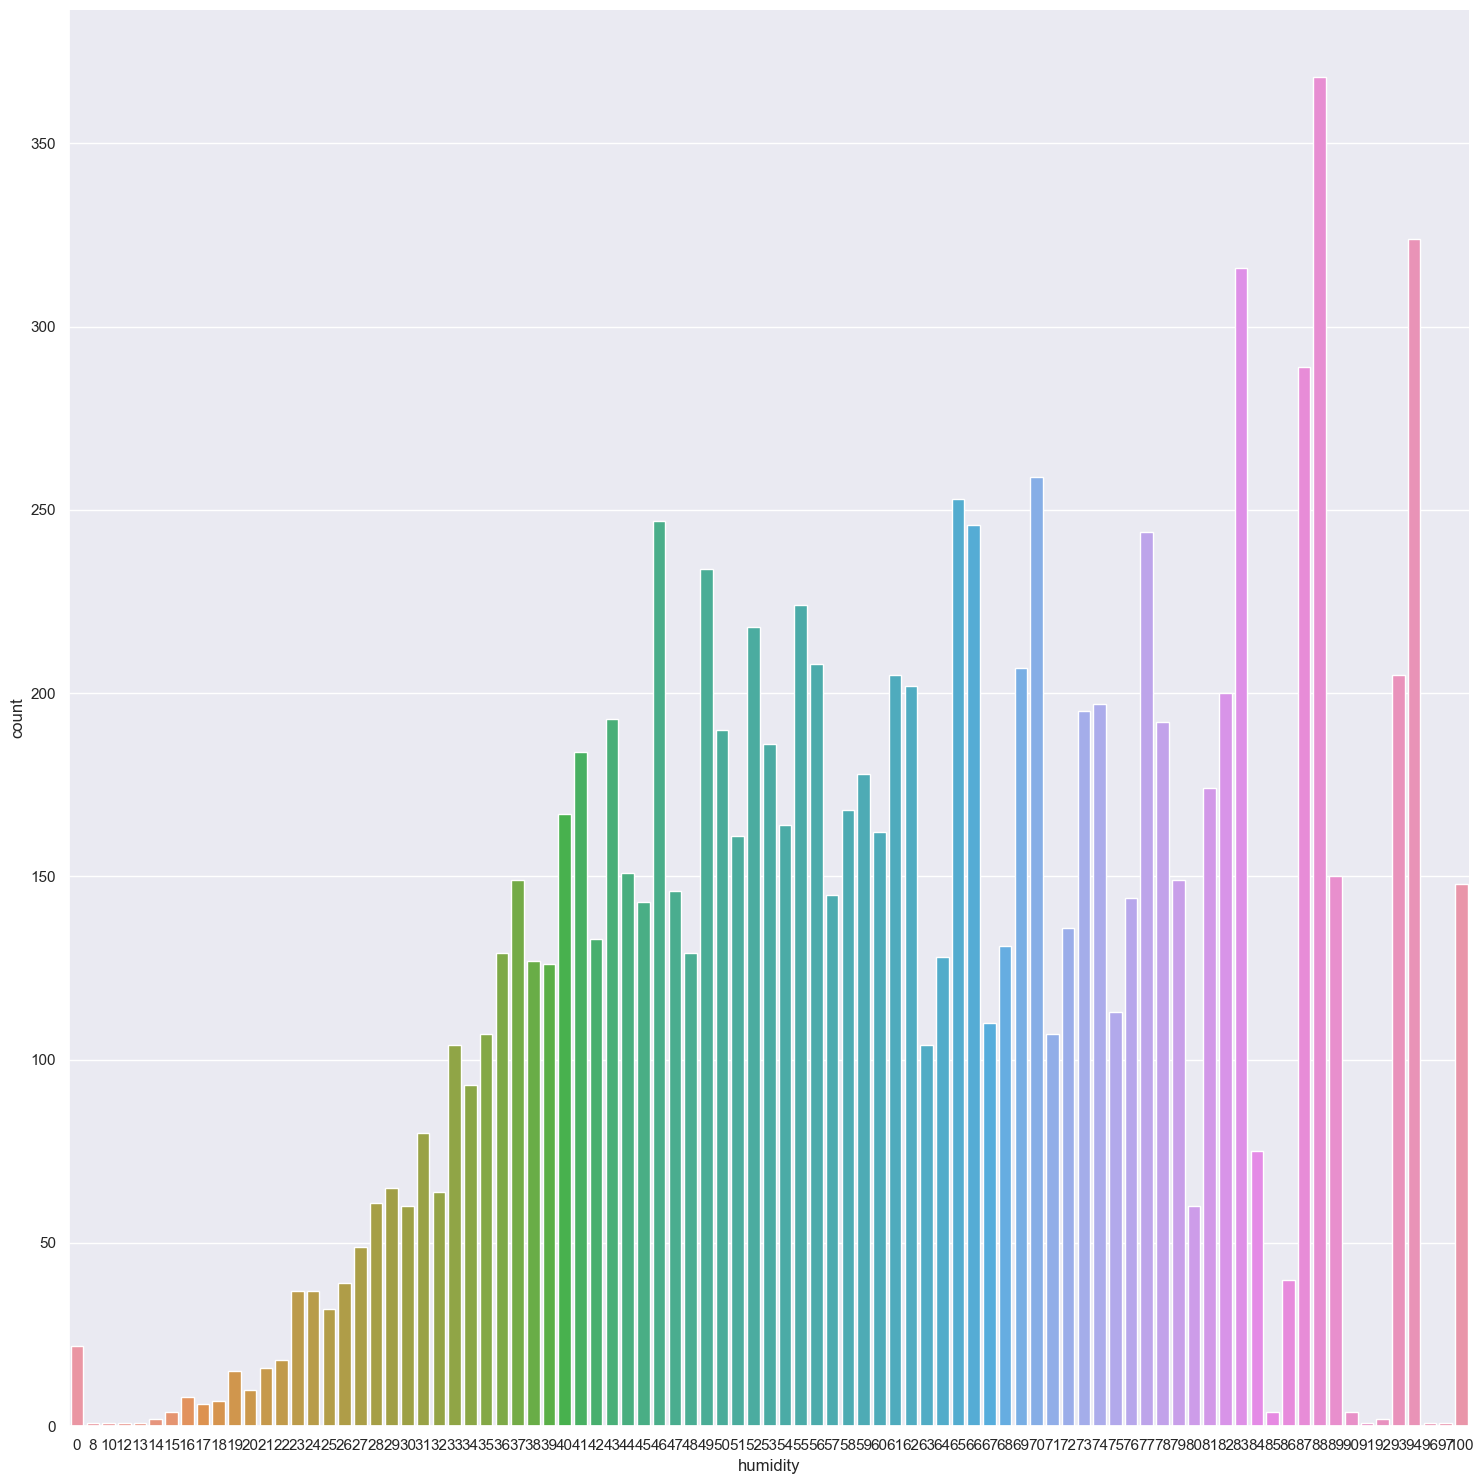

In [86]:
sns.catplot(x="humidity" ,kind="count",data=df , height=15)

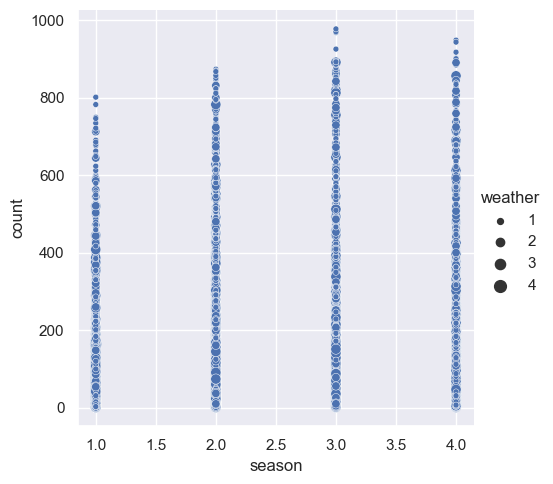

In [87]:
sns.relplot(x="season", y="count",size="weather", data=df)

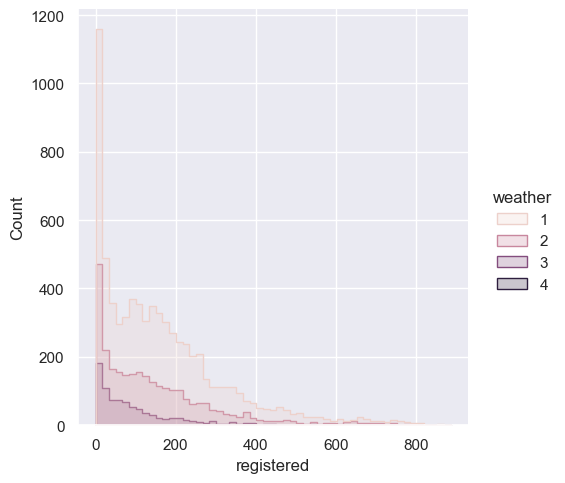

In [88]:
sns.displot(df, x="registered", hue="weather", element="step")

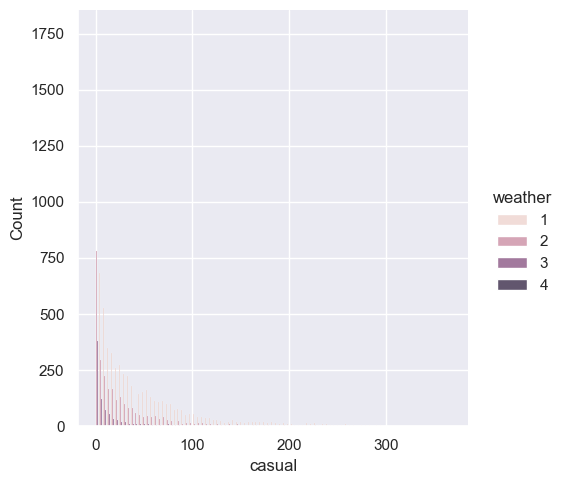

In [90]:
sns.displot(df, x="casual", hue="weather",  multiple="dodge")

## Train your model (Regression)

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# محاسبه رگرسیون خطی بر اساس دمای هوای احساس شده و کرایه دوچرخه توسط اعضا

In [160]:
Y=df[['registered']]
x_single=df[['atemp']]
X_train, X_test , y_train , y_test = train_test_split(x_single,Y,test_size=0.25,random_state=26)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predictions=regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('coef: ',regressor.coef_)
print('intercept:' ,regressor.intercept_)

Mean Absolute Error: 108.00156238363704
Mean Squared Error: 21902.9371221511
Root Mean Squared Error: 147.99640915289498
coef:  [[5.54635166]]
intercept: [22.69935769]


<Axes: ylabel='Count'>

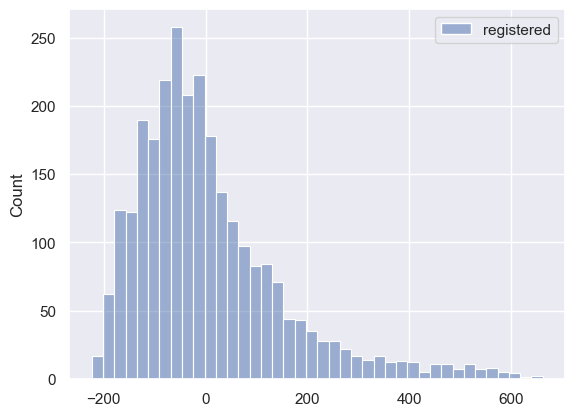

In [161]:
sns.histplot(y_test-predictions)

# محاسبه رگرسیون خطی بر اساس میزان رطوبت و کرایه دوچرخه توسط افراد عادی

In [162]:
x_single=df[['humidity']]
y2=df[['casual']]
X_train, X_test , y_train , y_test = train_test_split(x_single,y2,test_size=0.25,random_state=26)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predictions=regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('coef: ',regressor.coef_)
print('intercept:' ,regressor.intercept_)

Mean Absolute Error: 31.872207247340604
Mean Squared Error: 2367.4409427404285
Root Mean Squared Error: 48.65635562534897
coef:  [[-0.8959833]]
intercept: [90.83448743]


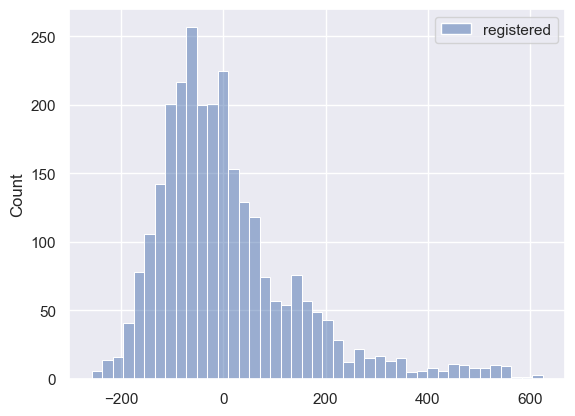

In [167]:
#جدول تفاوت خروجی واقعی و پیش بینی شده
sns.histplot(y_test-predictions)

In [154]:
X=df.drop("datetime", axis=1)
X.drop(["casual","registered","count"], axis=1  , inplace=True)

In [164]:
X_train, X_test , y_train , y_test = train_test_split(X,Y,test_size=0.25,random_state=26)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predictions=regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('coef: ',regressor.coef_)
print('intercept:' ,regressor.intercept_)

Mean Absolute Error: 101.17347667793115
Mean Squared Error: 19589.720425488085
Root Mean Squared Error: 139.96328241895475
coef:  [[ 18.8514853    8.52698505  18.42654513   2.4181062   -0.36927082
    4.98526849  -2.15338093   0.64591816 -18.42654513]]
intercept: [110.77814344]


<Axes: ylabel='Count'>

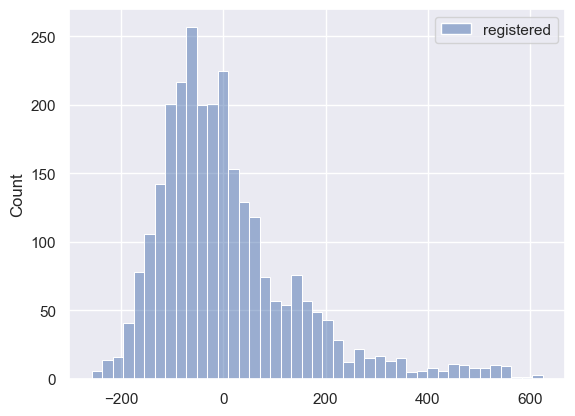

In [165]:
sns.histplot(y_test-predictions)

## Test Result

In [173]:
# پیش بینی وضعیت کرایه کننده بر اساس اطلاعات تست (عضو)
df_test=pd.read_csv("test.csv")
df_test = df_test.assign(weekend=lambda x: np.where((x['holiday'] == 0) & (x['workingday'] == 0), 1, x['holiday']))
X=df_test.drop("datetime", axis=1)
predictions_test=regressor.predict(X)
predictions_test

array([[99.40171346],
       [93.92265689],
       [93.92265689],
       ...,
       [88.65125947],
       [99.73469305],
       [80.35426469]])

## Send us the Result (Maktabkhoone)